In [1]:
import pandas as pd
import sqlalchemy as sql
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import sklearn as sk
import kagglehub
import os
import plotly.express as px
import plotly.graph_objects as go

In [ ]:

data_path= '/home/cip/ce/ix05ogym/Majid/MADE/data/'
urls = ["syedabdulshameer/international-students-in-canada",
        "webdevbadger/international-student-demographics",
        'justin2028/unemployment-in-america-per-us-state'
]
for url in urls:
    path = kagglehub.dataset_download(url)
    os.system(f'cp -r {path}/* {data_path}')
    print("Path to dataset files:", path)
    os.listdir(path)
    
    


Path to dataset files: /home/cip/ce/ix05ogym/.cache/kagglehub/datasets/syedabdulshameer/international-students-in-canada/versions/2
Path to dataset files: /home/cip/ce/ix05ogym/.cache/kagglehub/datasets/webdevbadger/international-student-demographics/versions/2
Path to dataset files: /home/cip/ce/ix05ogym/.cache/kagglehub/datasets/justin2028/unemployment-in-america-per-us-state/versions/3


: 

Pipline:

extract and load -> preprocess & cleaning -> transform and type -> load into sql table

In [ ]:
csv_names= os.listdir(data_path)
df ={}
for name in csv_names:
    name = name.split('.')
    extention = name[1]
    name = name[0]
    if extention != 'csv':
        continue
    
    print(name)
    df[name] = pd.read_csv(data_path+name+'.csv')
    #display(df[name])
    


origin
field_of_study
academic_detail
Internation_students_Canada
Unemployment in America Per US State
Internation_students_Province_Canada
source_of_fund
status
International_Students_Study_level
academic


: 

In [ ]:
Internation_students_canada = df['Internation_students_Canada']
Internation_students_us =df['origin']


: 

In [ ]:
Internation_students_canada.head()

,Country of Citizenship,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,95,115,95,80,95,90,80,170,140
1,Albania,115,165,185,245,375,250,305,345,545
2,Algeria,1060,845,1020,1490,2690,2170,3165,5360,7180
3,Andorra,0,0,0,0,0,0,10,5,0
4,Angola,65,80,40,25,120,30,50,75,65


: 

In [ ]:
Internation_students_us.head()

,year,origin_region,origin,academic_type,students
0,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Graduate,2
1,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Other,0
2,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Undergraduate,6
3,2000/01,Asia,"Asia, Unspecified",Graduate,0
4,2000/01,Asia,"Asia, Unspecified",Other,6


: 

In [ ]:
print(Internation_students_canada.isnull().any().any(),
Internation_students_canada.isna().any().any())


False False


: 

In [ ]:
print(Internation_students_us.isnull().any().any(),
Internation_students_us.isna().any().any())

False False


: 

In [ ]:
Internation_students_us =Internation_students_us.groupby(['origin','year']).agg({'students': 'sum'}).reset_index()#.plot(kind='bar', figsize=(12, 8), width=0.8, stacked=True,legend=False,)
Internation_students_us['year'] = Internation_students_us['year'].str.split('/').str[0]
Internation_students_us.head()

KeyError: 'year'

: 

In [ ]:
Internation_students_us = Internation_students_us.pivot(index='origin', columns='year', values='students').fillna(0)
Internation_students_us.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,75.0,92.0,102.0,109.0,155.0,175.0,268.0,338.0,407.0,426.0,...,450.0,471.0,498.0,506.0,476.0,418.0,422.0,354.0,420.0,682.0
"Africa, Subsaharan, Unspecified",8.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,1117.0,1129.0,1106.0,916.0,866.0,904.0,841.0,689.0,757.0,790.0,...,636.0,670.0,705.0,781.0,884.0,993.0,1095.0,1053.0,1026.0,1087.0
Algeria,220.0,196.0,177.0,148.0,143.0,132.0,145.0,179.0,172.0,178.0,...,173.0,175.0,158.0,192.0,212.0,238.0,239.0,219.0,268.0,302.0
Andorra,5.0,8.0,11.0,9.0,11.0,6.0,3.0,9.0,12.0,11.0,...,9.0,9.0,11.0,16.0,14.0,17.0,11.0,16.0,18.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,2.0,9.0,4.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,411.0,435.0,374.0,284.0,238.0,246.0,248.0,233.0,249.0,265.0,...,440.0,516.0,599.0,658.0,517.0,398.0,320.0,293.0,305.0,305.0
"Yugoslavia, Former",1790.0,2028.0,1959.0,1851.0,1233.0,621.0,294.0,114.0,58.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


: 

In [ ]:
Internation_students_canada.rename(columns={'Country of Citizenship':'origin'}, inplace=True)
#Internation_students_canada

,origin,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,95,115,95,80,95,90,80,170,140
1,Albania,115,165,185,245,375,250,305,345,545
2,Algeria,1060,845,1020,1490,2690,2170,3165,5360,7180
3,Andorra,0,0,0,0,0,0,10,5,0
4,Angola,65,80,40,25,120,30,50,75,65
...,...,...,...,...,...,...,...,...,...,...
212,"Virgin Islands, British",0,0,0,0,0,0,0,0,0
213,Western Sahara,0,0,0,0,0,0,0,0,0
214,Yemen,175,210,265,275,275,260,210,170,155
215,Zambia,120,125,120,125,135,105,130,170,195


: 

In [ ]:
merged_table = pd.merge(Internation_students_us, Internation_students_canada, on='origin', how='inner', suffixes=('', '_Canada'))
merged_table.iloc[:, 1:] = merged_table.iloc[:, 1:].astype('float')
merged_table.head()


/tmp/ipykernel_70571/3526982011.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         95.0
1        115.0
2       1060.0
3          0.0
4         65.0
5          0.0
6         60.0
7        160.0
8         20.0
9          0.0
10       480.0
11       110.0
12        70.0
13        25.0
14      1400.0
15       190.0
16        45.0
17       315.0
18        60.0
19         0.0
20         5.0
21        50.0
22      6625.0
23         0.0
24        35.0
25       140.0
26       135.0
27         0.0
28        25.0
29       360.0
30      1380.0
31         0.0
32        80.0
33       100.0
34        75.0
35         0.0
36        10.0
37       100.0
38         5.0
39       170.0
40       410.0
41       830.0
42       180.0
43        85.0
44        15.0
45       145.0
46         5.0
47        95.0
48     12125.0
49         0.0
50         0.0
51        10.0
52      2060.0
53       810.0
54       140.0
55        25.0
56 

,origin,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2022,2015_Canada,2016_Canada,2017_Canada,2018_Canada,2019_Canada,2020_Canada,2021_Canada,2022_Canada,2023
0,Afghanistan,75.0,92.0,102.0,109.0,155.0,175.0,268.0,338.0,407.0,...,682.0,95.0,115.0,95.0,80.0,95.0,90.0,80.0,170.0,140.0
1,Albania,1117.0,1129.0,1106.0,916.0,866.0,904.0,841.0,689.0,757.0,...,1087.0,115.0,165.0,185.0,245.0,375.0,250.0,305.0,345.0,545.0
2,Algeria,220.0,196.0,177.0,148.0,143.0,132.0,145.0,179.0,172.0,...,302.0,1060.0,845.0,1020.0,1490.0,2690.0,2170.0,3165.0,5360.0,7180.0
3,Andorra,5.0,8.0,11.0,9.0,11.0,6.0,3.0,9.0,12.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0
4,Angola,348.0,360.0,432.0,442.0,431.0,415.0,442.0,503.0,544.0,...,553.0,65.0,80.0,40.0,25.0,120.0,30.0,50.0,75.0,65.0


: 

In [ ]:
us = merged_table[['2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

canada_column = ['2015_Canada',
       '2016_Canada', '2017_Canada', '2018_Canada', '2019_Canada',
       '2020_Canada', '2021_Canada', '2022_Canada']
canada = merged_table[canada_column]

canada.columns = [col.replace('_Canada', '') for col in canada.columns]


us = us.astype('float')
canada = canada.astype('float')

: 

In [ ]:



pd.set_option('display.max_rows', 200)

#canada.isnull().any().any()
corr = us.corrwith(canada,1)#.merge(merged_table['origin'])
#pd.merge(corr,merged_table['origin'],how='inner',left_index=True,right_index=True)
result = pd.concat([merged_table['origin'], corr], axis=1,).rename(columns={0:'corr'})
merged_table = merged_table.merge(result)
columns_to_select = ['origin','corr'] +  list(us.columns) + canada_column
result = result.sort_values(by='corr')
result = merged_table.loc[result.index,columns_to_select].dropna()
result

,origin,corr,2015,2016,2017,2018,2019,2020,2021,2022,2015_Canada,2016_Canada,2017_Canada,2018_Canada,2019_Canada,2020_Canada,2021_Canada,2022_Canada
15,Barbados,-0.881592,319.0,319.0,322.0,333.0,298.0,339.0,269.0,287.0,190.0,235.0,240.0,265.0,300.0,180.0,365.0,315.0
135,Tajikistan,-0.819153,235.0,204.0,222.0,229.0,242.0,205.0,183.0,170.0,0.0,10.0,15.0,10.0,10.0,10.0,20.0,35.0
42,El Salvador,-0.743765,1632.0,1570.0,1554.0,1566.0,1581.0,1492.0,1445.0,1309.0,180.0,225.0,280.0,290.0,275.0,195.0,270.0,405.0
91,Mauritania,-0.729479,97.0,103.0,106.0,84.0,67.0,53.0,53.0,41.0,35.0,30.0,60.0,65.0,65.0,55.0,80.0,80.0
65,Iran,-0.694610,12269.0,12643.0,12783.0,12142.0,11451.0,9614.0,9295.0,10812.0,2405.0,3095.0,4860.0,7260.0,10060.0,7435.0,12420.0,13890.0
66,Iraq,-0.685853,1901.0,1698.0,1438.0,1237.0,965.0,771.0,597.0,544.0,120.0,160.0,150.0,215.0,170.0,140.0,235.0,235.0
19,Bermuda,-0.626924,319.0,315.0,296.0,280.0,251.0,234.0,235.0,228.0,0.0,0.0,0.0,0.0,50.0,10.0,60.0,15.0
55,Grenada,-0.618185,186.0,194.0,170.0,133.0,161.0,141.0,118.0,129.0,25.0,40.0,40.0,40.0,30.0,40.0,50.0,40.0
74,Kuwait,-0.593804,9772.0,9825.0,10190.0,9195.0,8375.0,6846.0,5923.0,5427.0,140.0,150.0,170.0,150.0,170.0,100.0,235.0,265.0
34,Cuba,-0.545697,153.0,119.0,152.0,163.0,130.0,115.0,114.0,113.0,75.0,80.0,75.0,95.0,95.0,80.0,180.0,190.0


: 

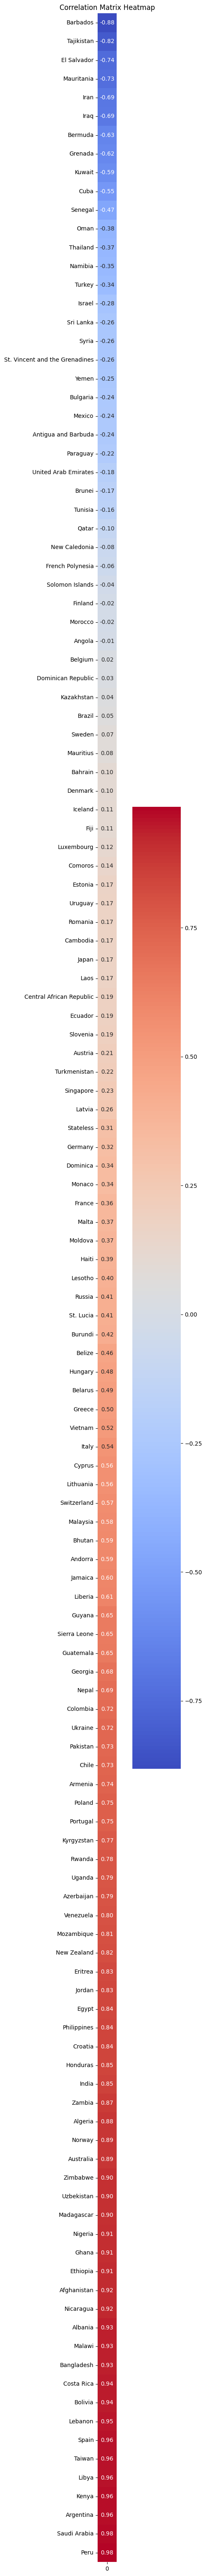

: 

In [ ]:
plt.figure(figsize=(10, 80))
sns.heatmap(result['corr'].to_numpy()[:,None],yticklabels=result['origin'], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()